In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Data_Science_Udemy/ML_Classificacao/Bases de dados/census.csv")

1 ) - Análises iniciais 

In [4]:
dados.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [5]:
linhas, colunas = dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:32561
Total de Colunas:15


In [6]:
for column in dados.columns:
    print(f"{column}: Number of unique values {dados[column].nunique()}")
    print("==========================================================")

age: Number of unique values 73
workclass: Number of unique values 9
final-weight: Number of unique values 21648
education: Number of unique values 16
education-num: Number of unique values 16
marital-status: Number of unique values 7
occupation: Number of unique values 15
relationship: Number of unique values 6
race: Number of unique values 5
sex: Number of unique values 2
capital-gain: Number of unique values 119
capital-loos: Number of unique values 92
hour-per-week: Number of unique values 94
native-country: Number of unique values 42
income: Number of unique values 2


In [7]:
dados.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
#Analise Estatística inicial

dados.describe().transpose()

count           mean            std      min       25%  \
age            32561.0      38.581647      13.640433     17.0      28.0   
final-weight   32561.0  189778.366512  105549.977697  12285.0  117827.0   
education-num  32561.0      10.080679       2.572720      1.0       9.0   
capital-gain   32561.0    1077.648844    7385.292085      0.0       0.0   
capital-loos   32561.0      87.303830     402.960219      0.0       0.0   
hour-per-week  32561.0      40.437456      12.347429      1.0      40.0   

                    50%       75%        max  
age                37.0      48.0       90.0  
final-weight   178356.0  237051.0  1484705.0  
education-num      10.0      12.0       16.0  
capital-gain        0.0       0.0    99999.0  
capital-loos        0.0       0.0     4356.0  
hour-per-week      40.0      45.0       99.0

In [10]:
dados.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [38]:
dados['income'].value_counts()

income
<=50K    24720
>50K      7841
Name: count, dtype: int64

2 ) - Visualização dos Dados 

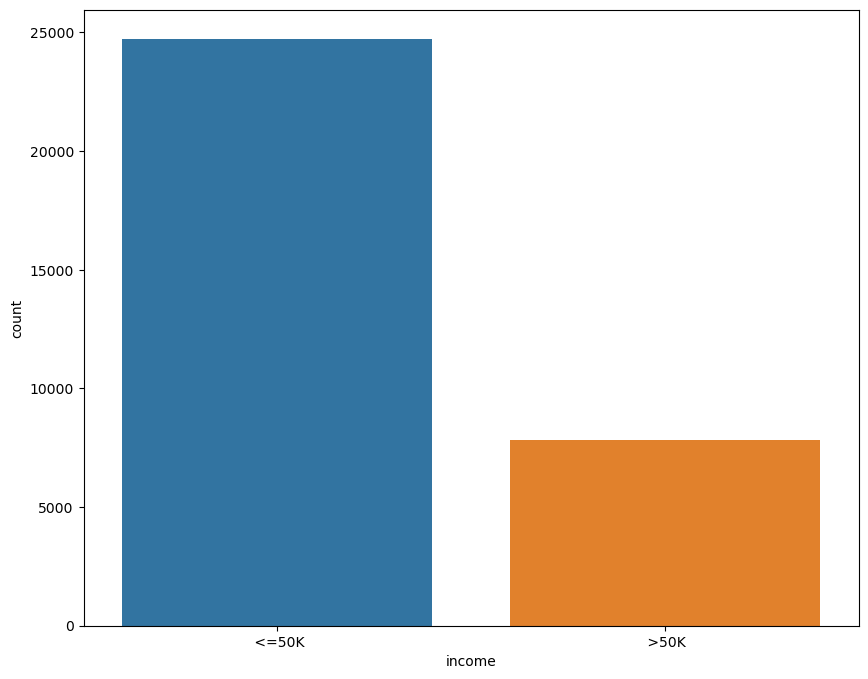

In [13]:
plt.figure(figsize=(10,8))
sns.countplot(x = dados['income']);

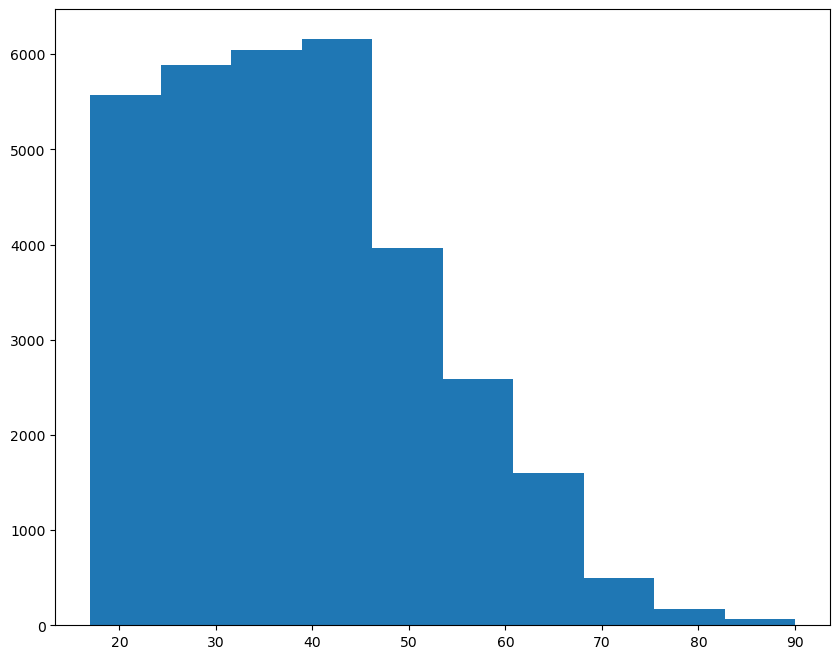

In [14]:
plt.figure(figsize=(10,8))
plt.hist(x = dados['age']);

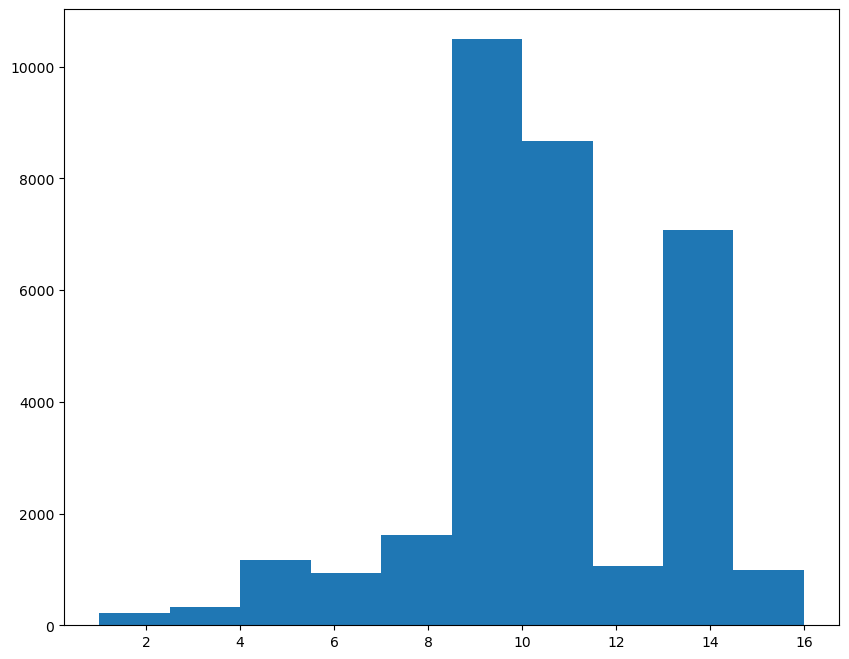

In [15]:
plt.figure(figsize=(10,8))
plt.hist(x = dados['education-num']);

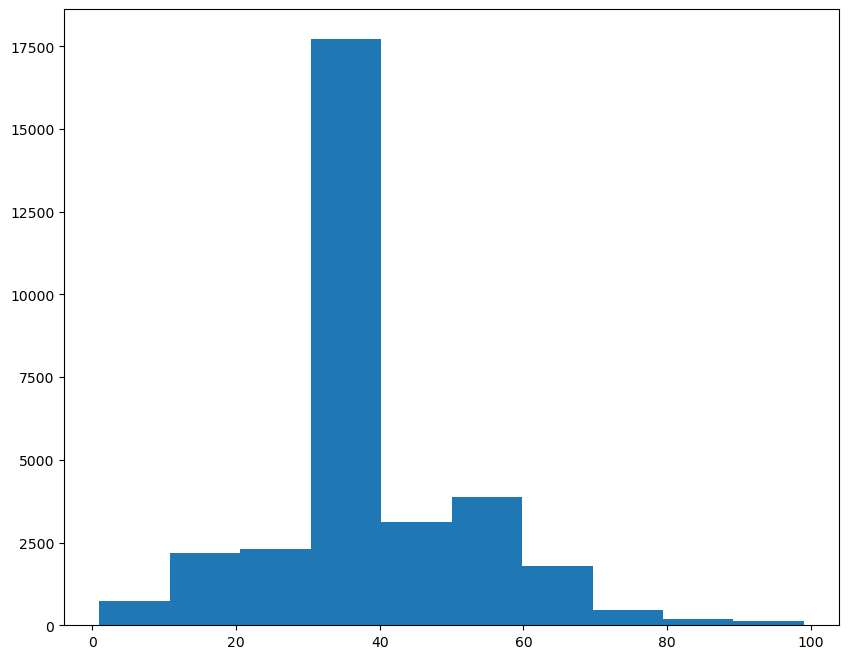

In [16]:
plt.figure(figsize=(10,8))
plt.hist(x = dados['hour-per-week']);

In [ ]:
#Geração de gráficos dinámicos

plt.figure(figsize=(10,8))
grafico = px.treemap(dados, path=['workclass', 'age'])
grafico.show()

<Figure size 1000x800 with 0 Axes>

In [22]:
plt.figure(figsize=(10,8))
grafico2 = px.treemap(dados, path=['occupation','relationship', 'age'])
grafico2.show()

<Figure size 1000x800 with 0 Axes>

In [24]:
plt.figure(figsize=(10,8))
grafico3 = px.parallel_categories(dados, dimensions=['occupation','relationship'])
grafico3.show()

<Figure size 1000x800 with 0 Axes>

In [25]:
grafico4 = px.parallel_categories(dados, dimensions=['workclass','occupation','income'])
grafico4.show()

In [26]:
grafico5 = px.parallel_categories(dados, dimensions=['education','income'])
grafico5

3 ) - Divisão dos Daddos em Previsores e Classe

In [27]:
dados.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [28]:
x_dados = dados.iloc[:, 0:14].values

In [ ]:
print("Previsores: ")
x_dados

Dados previsores: 


array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [32]:
y_dados = dados.iloc[:, 14].values

In [ ]:
print("Classe: ")
y_dados

Dados Classe: 


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

4 ) - Transformação dos Atributos Categóricos com Label_Encoder e OneHotEncoder

In [ ]:
#Importação da Biblioteca 

x_dados[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [41]:
dados.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [42]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [43]:
x_dados[:,1] = label_encoder_workclass.fit_transform(x_dados[:,1])
x_dados[:,3] = label_encoder_education.fit_transform(x_dados[:,3])
x_dados[:,5] = label_encoder_marital.fit_transform(x_dados[:,5])
x_dados[:,6] = label_encoder_occupation.fit_transform(x_dados[:,6])
x_dados[:,7] = label_encoder_relationship.fit_transform(x_dados[:,7])
x_dados[:,8] = label_encoder_race.fit_transform(x_dados[:,8])
x_dados[:,9] = label_encoder_sex.fit_transform(x_dados[:,9])
x_dados[:,13] = label_encoder_country.fit_transform(x_dados[:,13])

In [44]:
x_dados

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [46]:
#Conversão para OneHot Encoder que tira o peso das variaveis
#Importação de duas Base de Dados

onehotencoder_dados = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], remainder='passthrough')

In [47]:
x_dados = onehotencoder_dados.fit_transform(x_dados).toarray()

In [48]:
x_dados

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [50]:
linhas, colunas = x_dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:32561
Total de Colunas:108


5 ) - Aplicação do Escalonamento dos valores

In [53]:
#importação da Biblioteca

scaler_dados = StandardScaler()
x_dados = scaler_dados.fit_transform(x_dados)

In [55]:
x_dados[0]

array([-0.2444502 , -0.17429511, -0.26209736, -0.01466381, -1.5167923 ,
       -0.18838933, -0.29093568,  4.90769968, -0.02073999, -0.17175325,
       -0.19348662, -0.11609195, -0.07201601, -0.10164955, -0.1422718 ,
       -0.12664495, -0.18406376, -0.21053433,  2.25399324, -0.11334387,
       -0.68994199, -0.23637391, -0.03960742, -0.13419553, -0.53714425,
       -0.39750806, -0.02658695, -0.92284068, -0.11403678,  1.43105786,
       -0.1802846 , -0.17735813, -0.24494366,  2.76348874, -0.01662771,
       -0.37949517, -0.37774555, -0.17745022, -0.20957797, -0.25595432,
       -0.33554133, -0.06780164, -0.38166338, -0.14260848, -0.35531609,
       -0.17127887, -0.22710355, -0.82533335,  1.70899099, -0.17624972,
       -0.42934582, -0.34403232, -0.22492681, -0.09820087, -0.18155194,
       -0.32576824, -0.09161163,  0.4130197 , -0.70307135,  0.70307135,
       -0.13502327, -0.02416321, -0.06107342, -0.0480488 , -0.04260602,
       -0.05409379, -0.04641598, -0.02933708, -0.05714946, -0.05

6 ) - Divisão das Base de Dados em Treinamento e Teste

In [ ]:
#importação da Biblioteca
x_dados_treino, x_dados_teste, y_dados_treino, y_dados_teste = train_test_split(x_dados, y_dados, test_size=0.15, random_state=0)

In [57]:
print("Dados de treinamento: ")
print(x_dados_treino.shape, y_dados_treino.shape)

Dados de treinamento: 
(27676, 108) (27676,)


In [58]:
print("Dados de teste: ")
print(x_dados_teste.shape, y_dados_teste.shape)

Dados de teste: 
(4885, 108) (4885,)


7 ) - Aplicação dos Algoritmos - Naive Bayes

In [ ]:

naive_dados = GaussianNB()
naive_dados.fit(x_dados_treino, y_dados_treino)
previsao_naive = naive_dados.predict(x_dados_teste)
previsao_naive

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [61]:
y_dados_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [63]:
accuracy_score(y_dados_teste, previsao_naive)

0.4767656090071648

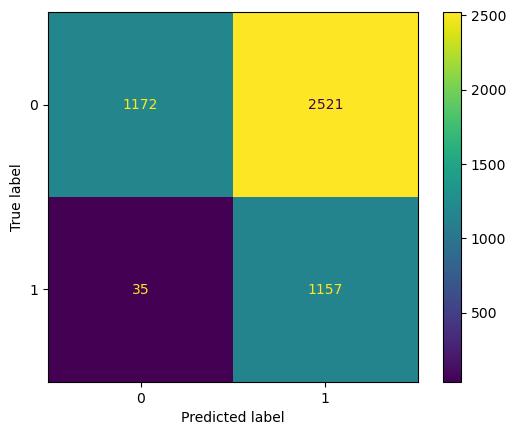

In [64]:
matriz_naive = confusion_matrix(y_dados_teste, previsao_naive)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_naive)
visual.plot();

In [78]:
print("Os resultados do algoritmo NAIVE BAIYES FORAM:")
print(classification_report(y_dados_teste, previsao_naive))

Os resultados do algoritmo NAIVE BAIYES FORAM:
              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



8 ) - Aplicação dos Algoritmos - Arvore de Decisão

In [66]:
arvore_dados = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_dados.fit(x_dados_treino, y_dados_treino)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [67]:
previsao_arvore = arvore_dados.predict(x_dados_teste)
previsao_arvore

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [68]:
y_dados_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [69]:
accuracy_score(y_dados_teste, previsao_arvore)

0.8104401228249745

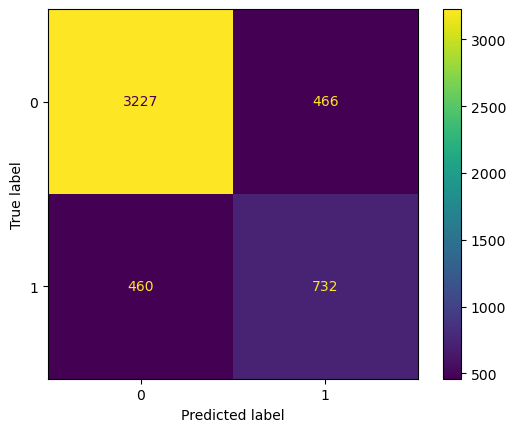

In [70]:
matriz_arvore = confusion_matrix(y_dados_teste, previsao_arvore)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_arvore)
visual.plot();

In [79]:
print("Os resultados do algoritmo ÁRVORE DE DECISÃO FORAM:")
print(classification_report(y_dados_teste, previsao_arvore))

Os resultados do algoritmo ÁRVORE DE DECISÃO FORAM:
              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



9 ) - Aplicação dos Algoritmos - Random Forest

In [72]:
random_forest_dados = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
random_forest_dados.fit(x_dados_treino, y_dados_treino) 

RandomForestClassifier(criterion='entropy', random_state=0)

In [73]:
previsao_random_forest = random_forest_dados.predict(x_dados_teste)
previsao_random_forest

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [74]:
y_dados_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [75]:
accuracy_score(y_dados_teste, previsao_random_forest)

0.8507676560900717

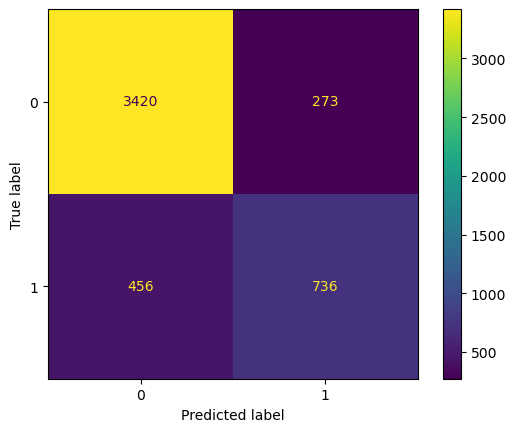

In [76]:
matriz_random_forest = confusion_matrix(y_dados_teste, previsao_random_forest)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_random_forest)
visual.plot();

In [80]:
print("Os resultados do algoritmo RANDOM FOREST FORAM:")
print(classification_report(y_dados_teste, previsao_random_forest))

Os resultados do algoritmo RANDOM FOREST FORAM:
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

